In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nbn = "03_" # Notebook Number; Prefix for artifacts path

In [74]:
datasets = ["DTD","EuroSAT","GTSRB","MNIST","SVHN","Caltech256","SUN397","iWildCam"]
# datasets = ["DTD","EuroSAT","Caltech256"]
nrow, ncol=3, 3

In [75]:
def calc_tpr(targ, pred):
    tp = np.sum((targ == 1) & (pred == 1))
    fn = np.sum((targ == 1) & (pred == 0))
    return tp / (tp + fn)
def calc_fpr(targ, pred):
    fp = np.sum((targ == 0) & (pred == 1))
    tn = np.sum((targ == 0) & (pred == 0))
    return fp / (fp + tn)
def predict_correctness(ent_ls,threshold):
    return np.where(ent_ls>threshold,0,1)

In [76]:
def auroc(pred_vec, target_vec, unc_vec, label, ax):
    cor_pred = np.where(pred_vec == target_vec, 1, 0)
    max_unc = unc_vec.max()
    min_unc = unc_vec.min()
    tpr = np.array([]) 
    fpr = np.array([])
    step = (max_unc - min_unc) / 100
    print(f"{label = },{max_unc = }, {min_unc = }, {step = }")
    for ent_step in np.arange(min_unc-step, max_unc+step, step):
        temp = predict_correctness(unc_vec, ent_step)
        tpr = np.append(tpr, calc_tpr(cor_pred, temp))
        fpr = np.append(fpr, calc_fpr(cor_pred, temp))
    area = np.trapz(tpr, fpr)
    sns.lineplot(x=fpr, y=tpr, label=f"{label} (AUC: {area:.2f})", ax=ax)
    return area

label = 'entropy 18',max_unc = 1.0524103009521215, min_unc = -11.512925464970229, step = 0.1256533576592235
label = 'entropy 50',max_unc = 1.0247267365767192, min_unc = -11.512925464970229, step = 0.12537652201546948
label = 'entropy 101',max_unc = 1.0720142709505842, min_unc = -11.512925464970229, step = 0.12584939735920814
label = 'kl(18||101)',max_unc = 3.0537488267704664, min_unc = -7.66277786326017, step = 0.10716526690030637
label = 'kl(101||18)',max_unc = 2.8727024491660638, min_unc = -7.66277786326017, step = 0.10535480312426233
label = 'ce(18||101)',max_unc = 3.05924499014354, min_unc = -11.512925464970229, step = 0.1457217045511377
label = 'ce(101||18)',max_unc = 2.875960237069509, min_unc = -11.512925464970229, step = 0.14388885702039736
label = 'entr101*kl(101||18)',max_unc = 3.038839221363714, min_unc = -19.175703328230398, step = 0.2221454254959411
label = 'entr18*kl(18||101)',max_unc = 3.2883435179239324, min_unc = -19.175703328230398, step = 0.2246404684615433
label = '

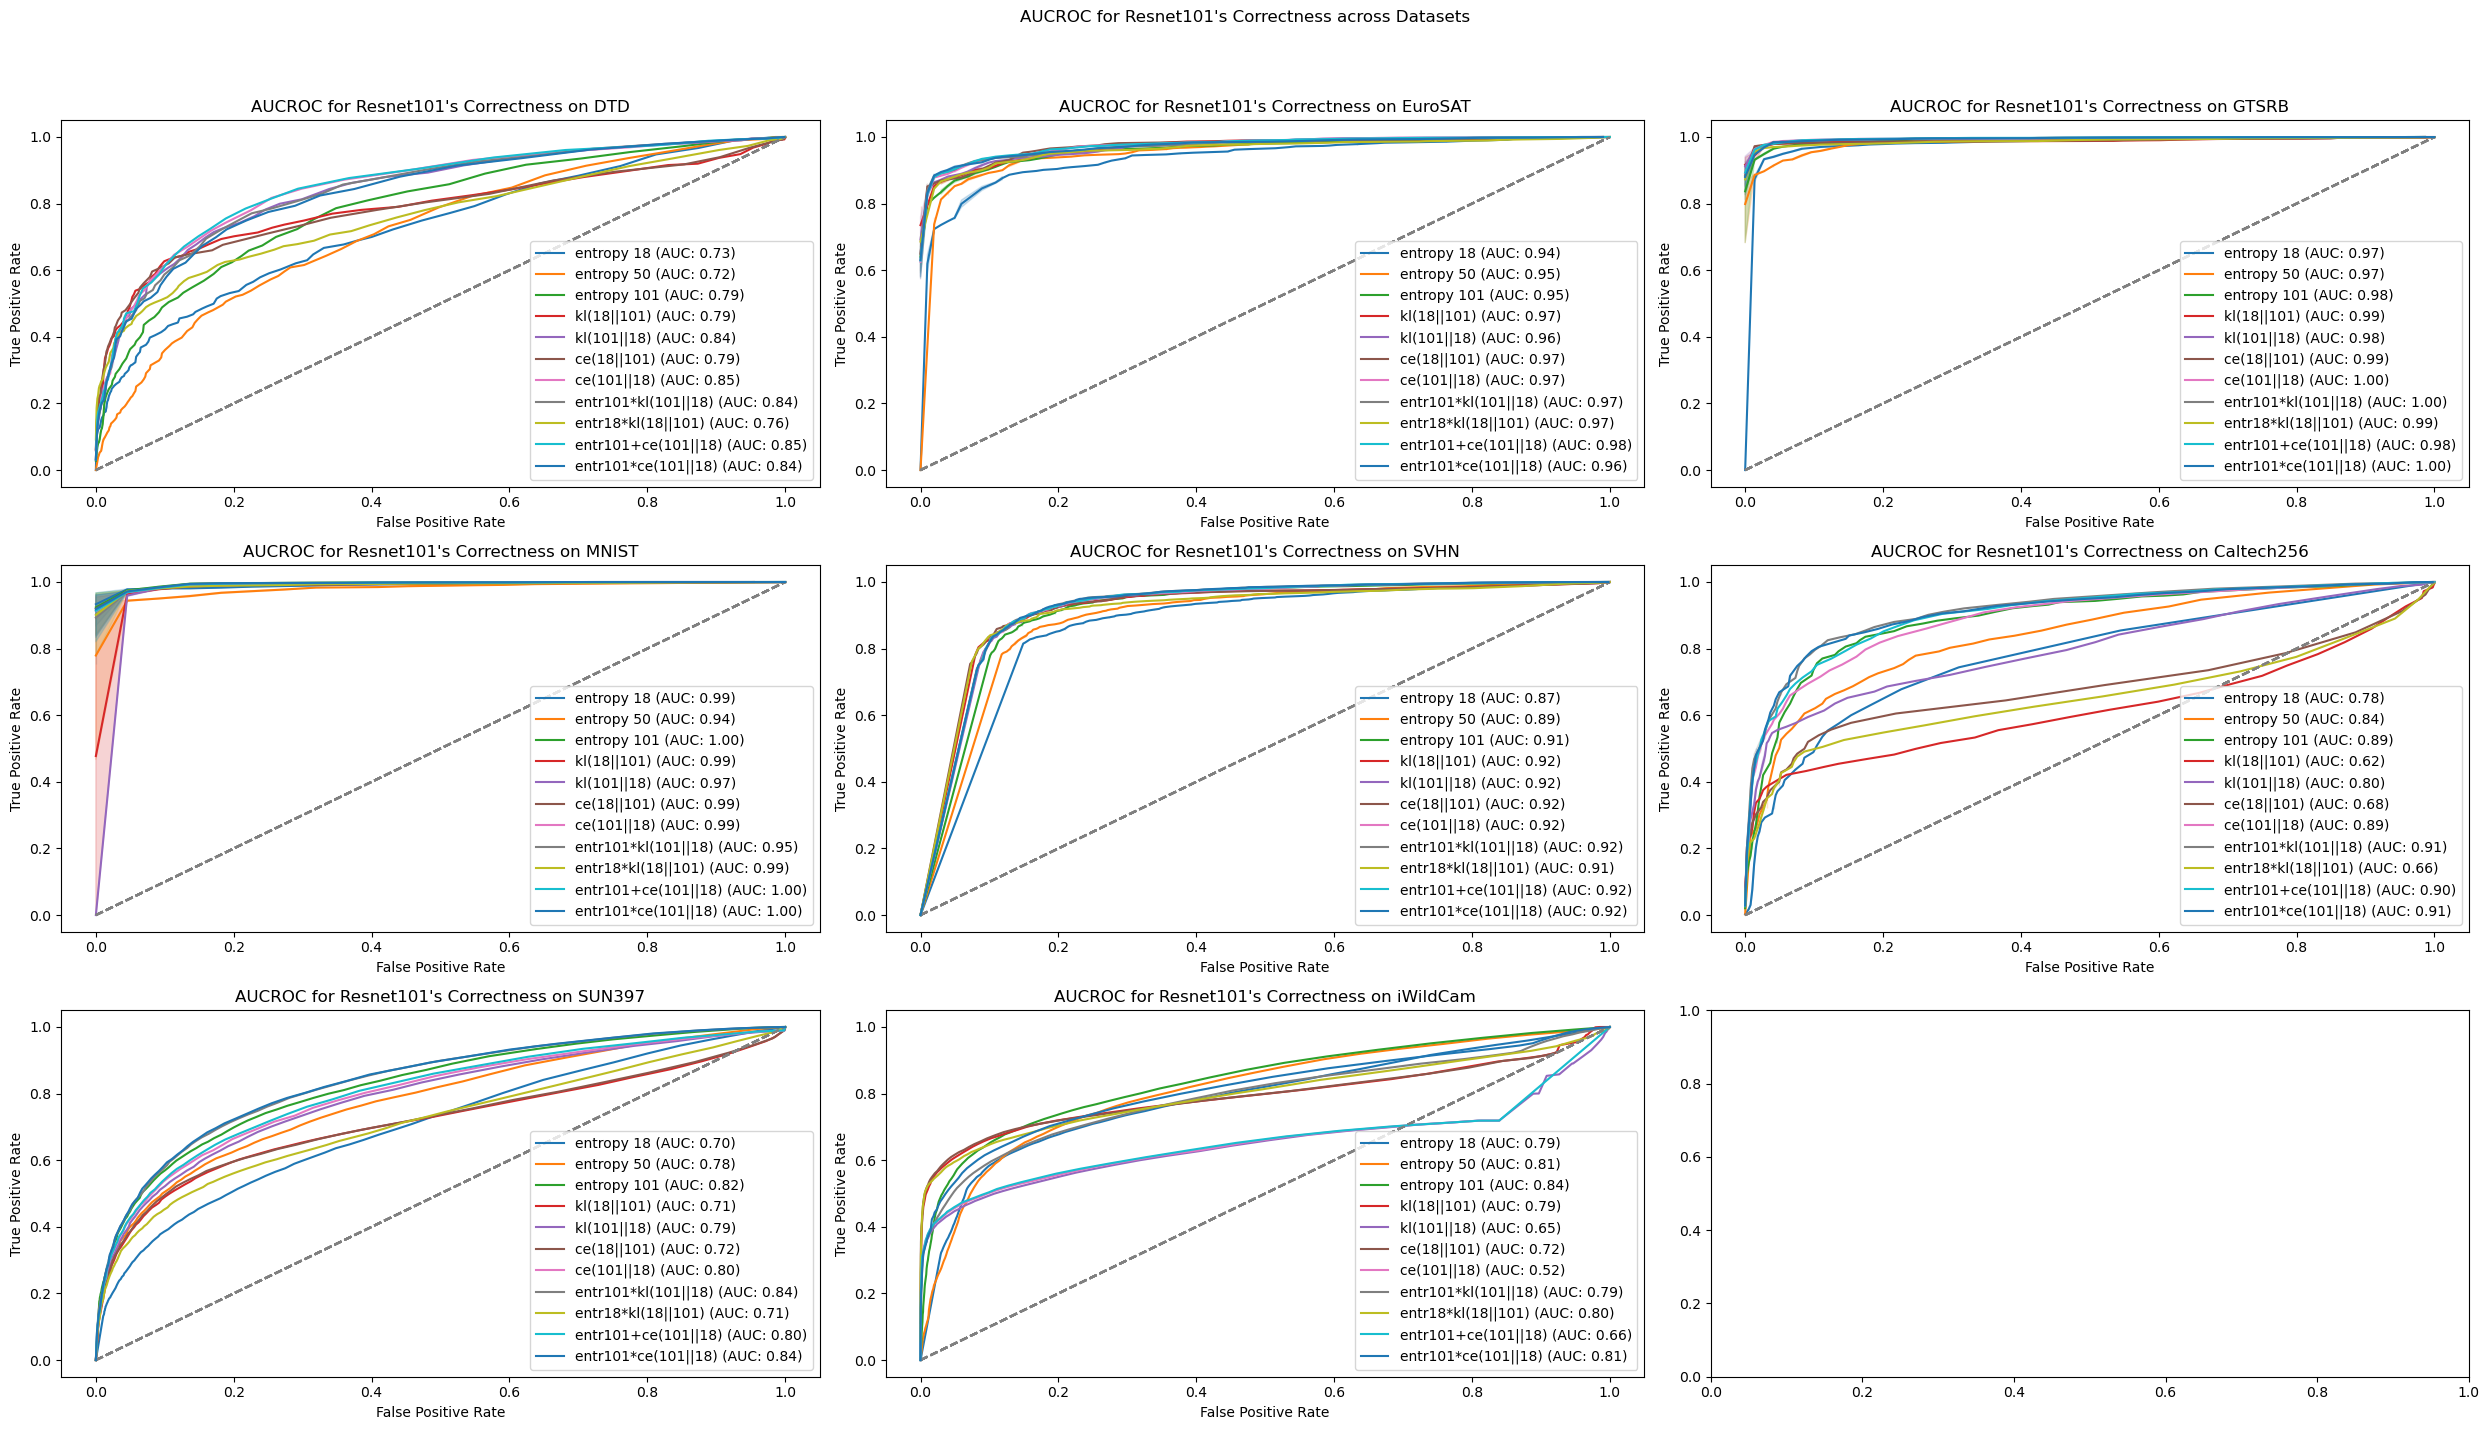

In [77]:
fig, axes = plt.subplots(nrow, ncol, figsize=(25, 15))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0")
    
    metrics = [
        (np.log(unc_pred["ent_18"]), "entropy 18"),
        (np.log(unc_pred["ent_50"]), "entropy 50"),
        (np.log(unc_pred["ent_101"]), "entropy 101"),
        (np.log(unc_pred["kl_18_101"]), "kl(18||101)"),
        (np.log(unc_pred["kl_101_18"]), "kl(101||18)"),
        (np.log(unc_pred["ce_18_101"]), "ce(18||101)"),
        (np.log(unc_pred["ce_101_18"]), "ce(101||18)"),
        (np.log(unc_pred["ent_101"] * unc_pred["kl_101_18"]), "entr101*kl(101||18)"),
        (np.log(unc_pred["ent_18"] * unc_pred["kl_18_101"]), "entr18*kl(18||101)"),
        (np.log(unc_pred["ent_101"] + unc_pred["ce_101_18"]), "entr101+ce(101||18)"),
        (np.log(unc_pred["ent_101"] * unc_pred["ce_101_18"]), "entr101*ce(101||18)")
    ]
    
    ax = axes[i // ncol, i % ncol]
    for metric, label in metrics:
        ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
        auroc(pred["pred101"], pred["target"], metric, label, ax)
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(f"AUCROC for Resnet101's Correctness on {ds}")
        ax.legend(loc="lower right")

plt.suptitle("AUCROC for Resnet101's Correctness across Datasets")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.savefig(f"artifacts/{nbn}aucroc.png")
plt.show()

label = 'entropy 18',max_unc = 1.0524103009521215, min_unc = -11.512925464970229, step = 0.1256533576592235
label = 'entropy 50',max_unc = 1.0247267365767192, min_unc = -11.512925464970229, step = 0.12537652201546948
label = 'entropy 101',max_unc = 1.0720142709505842, min_unc = -11.512925464970229, step = 0.12584939735920814
label = 'kl(18||50)',max_unc = 3.5807101487586874, min_unc = -7.66277786326017, step = 0.11243488012018858
label = 'kl(50||18)',max_unc = 3.1281813919018835, min_unc = -7.66277786326017, step = 0.10790959255162054
label = 'cross-entr(18,50)',max_unc = 3.581939112381161, min_unc = -11.512925464970229, step = 0.15094864577351388
label = 'cross-entr(50,18)',max_unc = 3.1294526198608565, min_unc = -11.512925464970229, step = 0.14642378084831084
label = 'entr50*kl(50||18)',max_unc = 3.0369503652770944, min_unc = -19.175703328230398, step = 0.22212653693507492
label = 'entr18*kl(18||50)',max_unc = 3.3667588376538027, min_unc = -19.175703328230398, step = 0.22542462165884

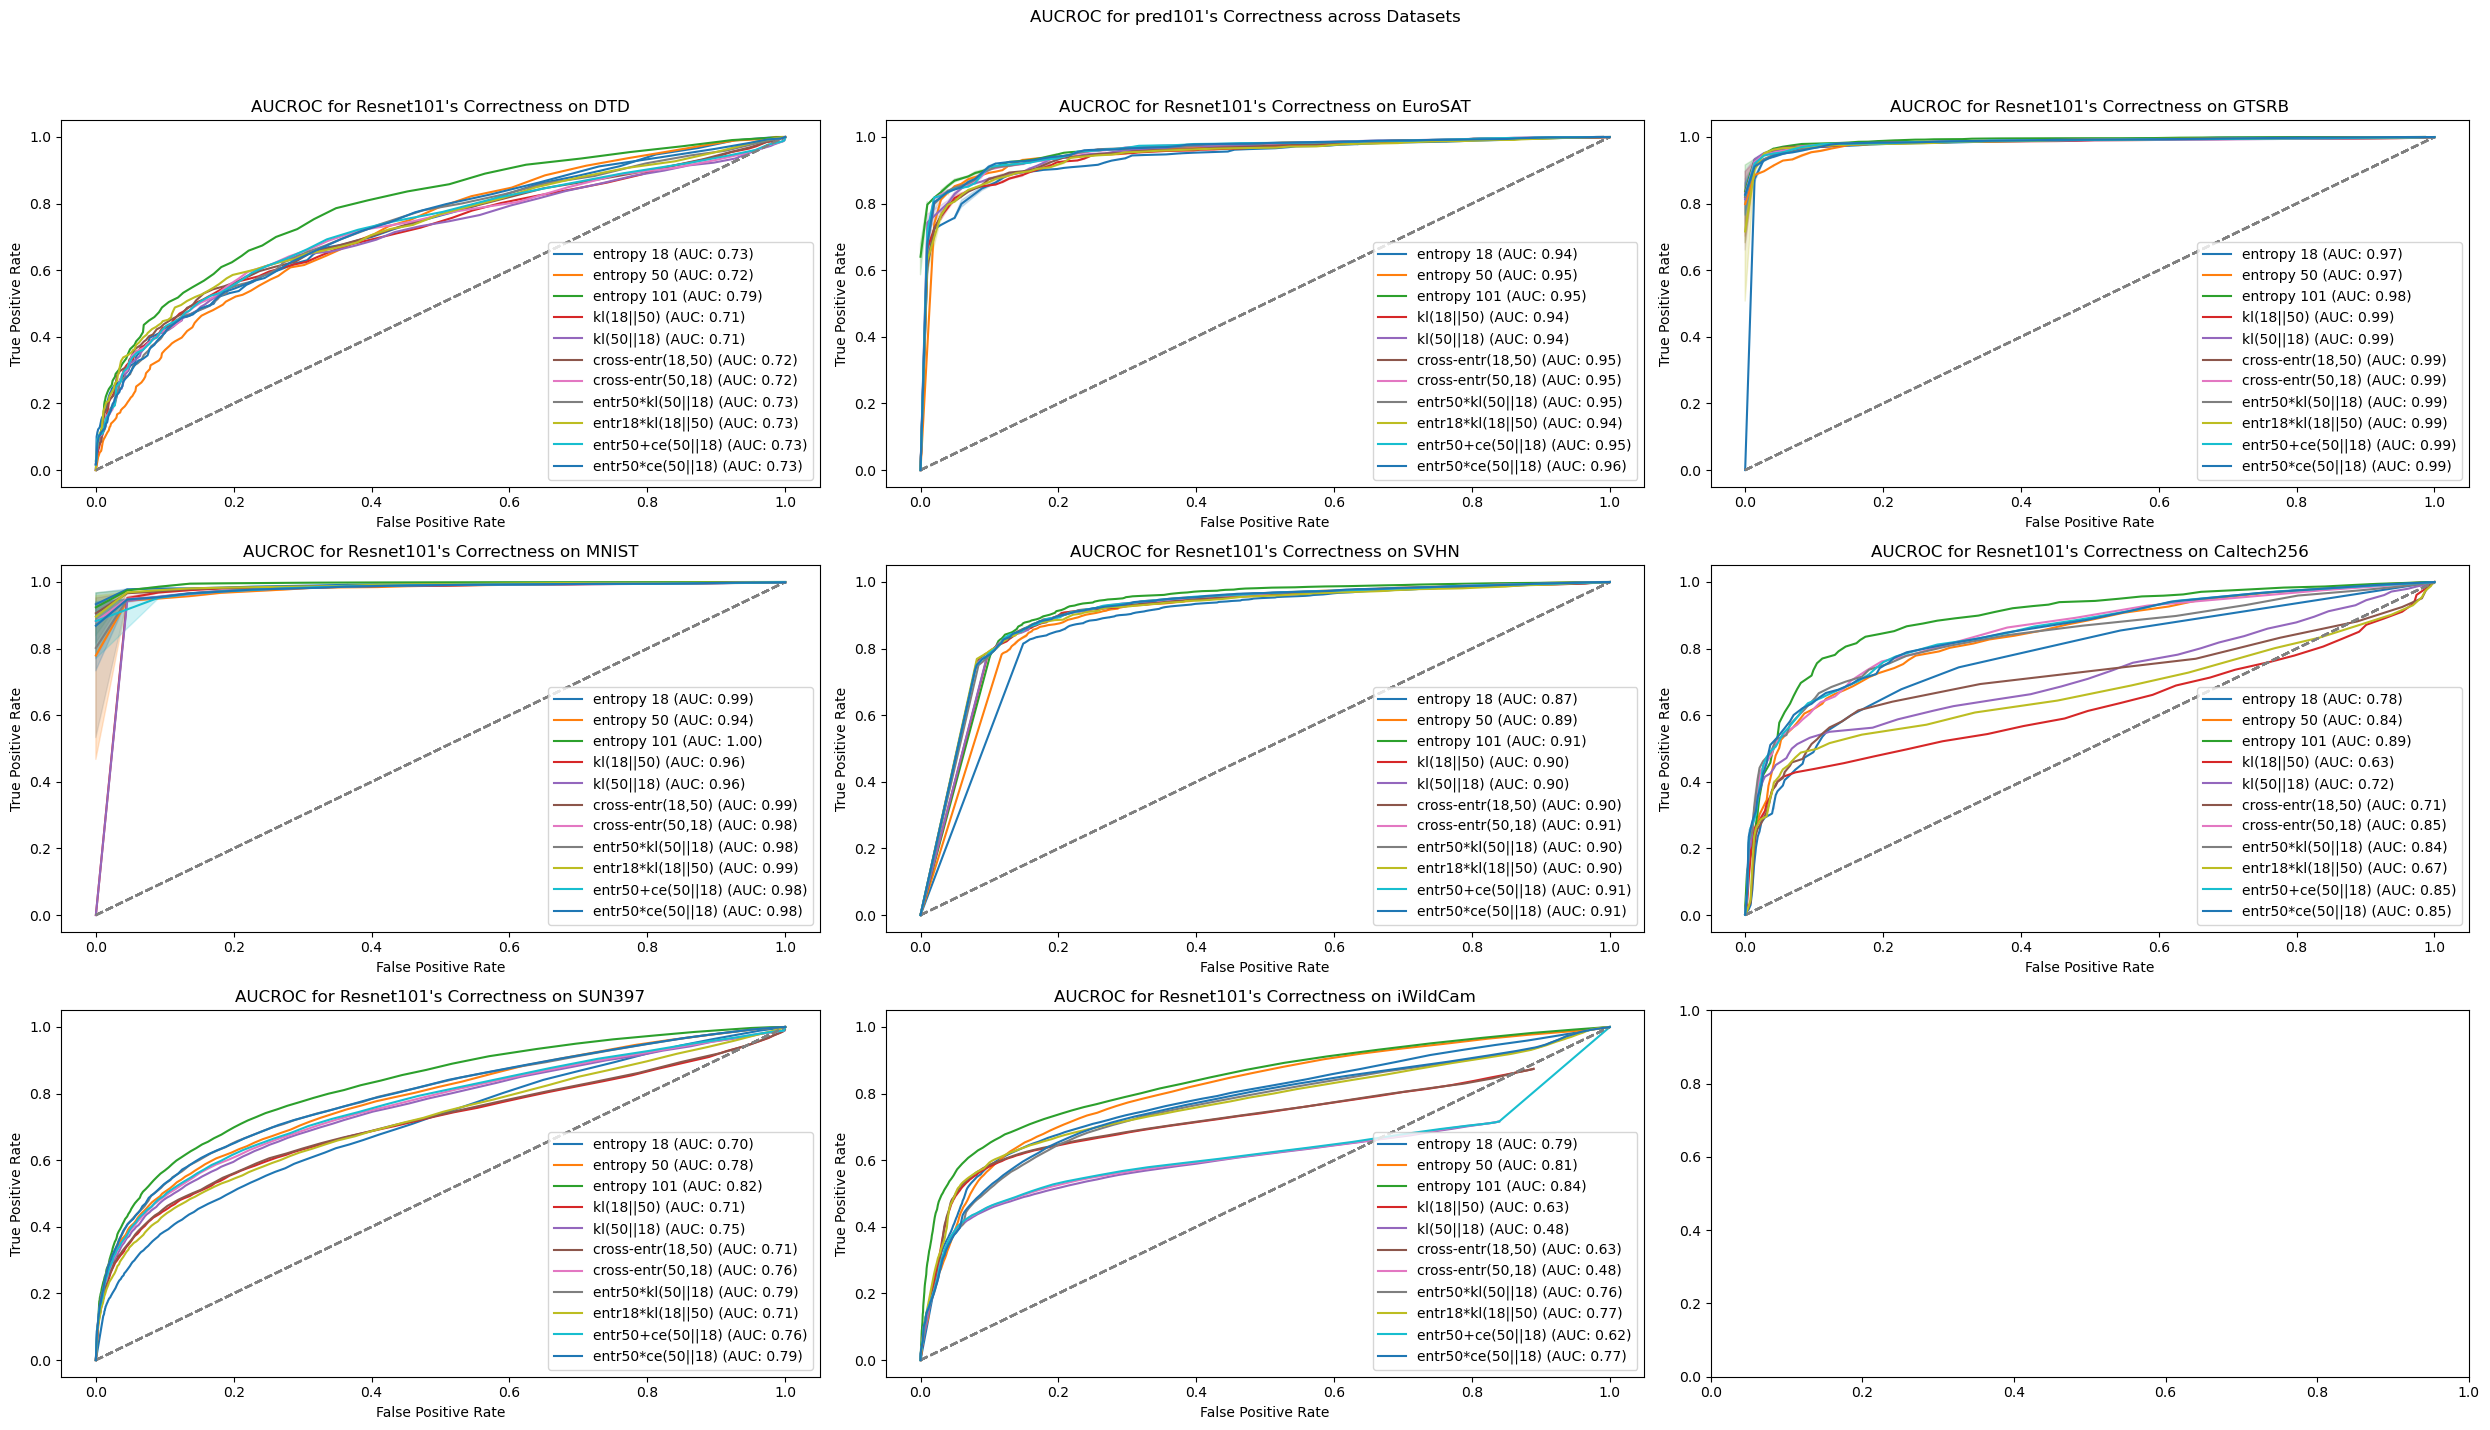

In [78]:
fig, axes = plt.subplots(nrow, ncol, figsize=(25, 15))

for i, ds in enumerate(datasets):
    evaluate_on = "pred101"
    pred = pd.read_csv(f"prediction_{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"uncertainty_{ds}.csv", index_col="Unnamed: 0").clip(-100,100)
    
    metrics = [
        (np.log(unc_pred["ent_18"]), "entropy 18"),
        (np.log(unc_pred["ent_50"]), "entropy 50"),
        (np.log(unc_pred["ent_101"]), "entropy 101"),
        (np.log(unc_pred["kl_18_50"]), "kl(18||50)"),
        (np.log(unc_pred["kl_50_18"]), "kl(50||18)"),
        (np.log(unc_pred["ce_18_50"]), "cross-entr(18,50)"),
        (np.log(unc_pred["ce_50_18"]), "cross-entr(50,18)"),
        (np.log(unc_pred["ent_50"] * unc_pred["kl_50_18"]), "entr50*kl(50||18)"),
        (np.log(unc_pred["ent_18"] * unc_pred["kl_18_50"]).clip(-100,100), "entr18*kl(18||50)"),
        (np.log(unc_pred["ent_50"] + unc_pred["ce_50_18"]), "entr50+ce(50||18)"),
        (np.log(unc_pred["ent_50"] * unc_pred["ce_50_18"]), "entr50*ce(50||18)")
    ]
    
    ax = axes[i // ncol, i % ncol]
    for metric, label in metrics:
        ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
        auroc(pred[evaluate_on], pred["target"], metric, label, ax)
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(f"AUCROC for Resnet101's Correctness on {ds}")
        ax.legend(loc="lower right")

plt.suptitle(f"AUCROC for {evaluate_on}'s Correctness across Datasets")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.savefig(f"artifacts/{nbn}aucroc_50.png")
plt.show()